In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from hyperopt import hp, tpe, Trials, fmin
import numpy as np

In [2]:
data = pd.read_csv('Mobile Classification.csv')


In [3]:
data[['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']] = data[['blue', 'dual_sim', 'four_g','three_g', 'touch_screen', 'wifi']].astype('bool')

In [4]:
x = data.iloc[:,:20]
y = data.iloc[:,-1:]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null int64
blue             2000 non-null bool
clock_speed      2000 non-null float64
dual_sim         2000 non-null bool
fc               2000 non-null int64
four_g           2000 non-null bool
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null bool
touch_screen     2000 non-null bool
wifi             2000 non-null bool
dtypes: bool(6), float64(2), int64(12)
memory usage: 230.5 KB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
price_range    2000 non-null int64
dtypes: int64(1)
memory usage: 15.7 KB


In [7]:
num = list(x.select_dtypes(include=[np.number]))
cat = list(x.select_dtypes(include=['bool']))
num
cat

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [8]:
scaler = StandardScaler()
x[['battery_power', 'clock_speed',  'fc',  'int_memory',  'm_dep',  'mobile_wt', 
   'n_cores',  'pc',  'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]= scaler.fit_transform(x[['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']])


In [9]:
for i in cat:
    x[i] = LabelEncoder().fit_transform(x[i])

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null float64
four_g           2000 non-null int64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null float64
pc               2000 non-null float64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null float64
sc_w             2000 non-null float64
talk_time        2000 non-null float64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
dtypes: float64(14), int64(6)
memory usage: 312.6 KB


In [11]:
y['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [13]:
bc1 = GradientBoostingClassifier(random_state =8)
space1 = {'n_estimators':  [200,800], 
        'min_samples_split': [10,30,50],
         'min_samples_leaf' : [1,2,4],
        'max_leaf_nodes': [10,30,50],
        'learning_rate': [0.1,0.5]}
rs = RandomizedSearchCV(estimator = bc1, param_distributions = space1, n_iter=50,
                                   scoring='f1_macro',
                                   cv=3, 
                                   verbose=1, random_state=8)

rs.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: Data

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [14]:
rs.best_params_
bcc = rs.best_estimator_

In [15]:
bcc.fit(x_train,y_train)


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=50,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=8, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[[94  6  0  0]
 [ 4 88  7  0]
 [ 0  4 88  4]
 [ 0  0  9 96]]
0.915
0.08499999999999996
[0.95918367 0.89795918 0.84615385 0.96      ]
[0.94       0.88888889 0.91666667 0.91428571]
[0.94949495 0.89340102 0.88       0.93658537]
0.9148703326442585


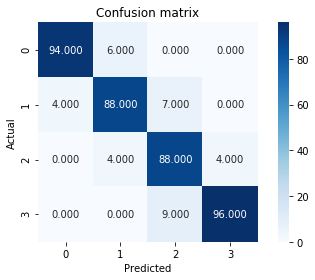

In [16]:
y_pred = bcc.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [17]:
y_train.head()

,price_range
1260,0
916,0
532,3
1159,0
1584,0


In [42]:
def objective_func(args):
    n_estimators = args['n_estimators']
    min_samples_split = args['min_samples_split']
    min_samples_leaf = args['min_samples_leaf']
    max_leaf_nodes = args['max_leaf_nodes']
    learning_rate = args['learning_rate']
    max_features = args['max_features']
 
    clf = GradientBoostingClassifier(n_estimators = n_estimators, max_leaf_nodes = max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features = max_features,learning_rate = learning_rate)
    
    
    clf.fit(x_train,y_train)    
    y_pred = clf.predict(x_test)
    f1 = -(f1_score(y_pred,y_test,  average='macro'))
    return f1
space = {'n_estimators':  hp.choice('n_estimators',[200,500,800]), 
        'min_samples_split': hp.choice('min_samples_split',range(10,100)),
         'min_samples_leaf' : hp.choice('min_samples_leaf',range(1,100)),
        'max_leaf_nodes': hp.choice('max_leaf_nodes',range(10,100)),
        'learning_rate': hp.choice('learning_rate',[0.1, 0.2, 0.3, 0.4, 0.5]),
        'max_features':hp.choice('max_features', ['auto', 'sqrt'])}
                                
                                
                                
best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
print(best_classifier)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  1%|          | 1/100 [00:01<02:23,  1.45s/it, best loss: -0.9044579989425006]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  2%|▏         | 2/100 [00:03<02:54,  1.78s/it, best loss: -0.9191046560133487]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  3%|▎         | 3/100 [00:05<02:45,  1.71s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  4%|▍         | 4/100 [00:11<04:40,  2.92s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  5%|▌         | 5/100 [00:13<04:21,  2.75s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  6%|▌         | 6/100 [00:16<04:14,  2.71s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  7%|▋         | 7/100 [00:18<04:03,  2.61s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  8%|▊         | 8/100 [00:20<03:43,  2.43s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  9%|▉         | 9/100 [00:21<02:57,  1.95s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 10%|█         | 10/100 [00:23<02:43,  1.82s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 11%|█         | 11/100 [00:24<02:41,  1.81s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 12%|█▏        | 12/100 [00:25<02:15,  1.54s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 13%|█▎        | 13/100 [00:26<02:06,  1.45s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 14%|█▍        | 14/100 [00:28<02:12,  1.55s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 15%|█▌        | 15/100 [00:30<02:12,  1.56s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 16%|█▌        | 16/100 [00:32<02:28,  1.77s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 17%|█▋        | 17/100 [00:34<02:40,  1.94s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 18%|█▊        | 18/100 [00:36<02:38,  1.93s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 19%|█▉        | 19/100 [00:41<03:31,  2.62s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 20%|██        | 20/100 [00:43<03:23,  2.55s/it, best loss: -0.9243115076915835]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 21%|██        | 21/100 [00:44<02:49,  2.14s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 22%|██▏       | 22/100 [00:45<02:25,  1.87s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 23%|██▎       | 23/100 [00:47<02:09,  1.69s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 24%|██▍       | 24/100 [00:48<01:55,  1.52s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 25%|██▌       | 25/100 [00:49<01:48,  1.45s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 26%|██▌       | 26/100 [00:50<01:42,  1.39s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 27%|██▋       | 27/100 [00:52<01:40,  1.38s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 28%|██▊       | 28/100 [00:53<01:40,  1.40s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 29%|██▉       | 29/100 [00:55<01:43,  1.46s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 30%|███       | 30/100 [00:56<01:37,  1.40s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 31%|███       | 31/100 [00:57<01:34,  1.37s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 32%|███▏      | 32/100 [00:59<01:40,  1.47s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 33%|███▎      | 33/100 [01:02<02:04,  1.86s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 34%|███▍      | 34/100 [01:03<01:50,  1.68s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 35%|███▌      | 35/100 [01:09<03:06,  2.88s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 36%|███▌      | 36/100 [01:10<02:40,  2.51s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 37%|███▋      | 37/100 [01:13<02:41,  2.57s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 38%|███▊      | 38/100 [01:14<02:07,  2.06s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 39%|███▉      | 39/100 [01:15<01:54,  1.87s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 40%|████      | 40/100 [01:19<02:27,  2.45s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 41%|████      | 41/100 [01:20<01:56,  1.97s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 42%|████▏     | 42/100 [01:22<01:49,  1.88s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 43%|████▎     | 43/100 [01:22<01:29,  1.57s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 44%|████▍     | 44/100 [01:26<02:02,  2.19s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 45%|████▌     | 45/100 [01:28<01:59,  2.17s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 46%|████▌     | 46/100 [01:29<01:37,  1.80s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 47%|████▋     | 47/100 [01:30<01:25,  1.61s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 48%|████▊     | 48/100 [01:33<01:34,  1.82s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 49%|████▉     | 49/100 [01:35<01:46,  2.09s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 50%|█████     | 50/100 [01:37<01:34,  1.89s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 51%|█████     | 51/100 [01:39<01:32,  1.89s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 52%|█████▏    | 52/100 [01:40<01:16,  1.59s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 53%|█████▎    | 53/100 [01:41<01:09,  1.48s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 54%|█████▍    | 54/100 [01:43<01:21,  1.76s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 55%|█████▌    | 55/100 [01:45<01:14,  1.65s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 56%|█████▌    | 56/100 [01:47<01:21,  1.86s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 57%|█████▋    | 57/100 [01:49<01:18,  1.83s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 58%|█████▊    | 58/100 [01:50<01:13,  1.76s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 59%|█████▉    | 59/100 [01:52<01:14,  1.81s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 60%|██████    | 60/100 [01:53<01:02,  1.56s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 61%|██████    | 61/100 [01:55<00:57,  1.48s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 62%|██████▏   | 62/100 [01:58<01:15,  1.99s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 63%|██████▎   | 63/100 [01:59<01:05,  1.78s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 64%|██████▍   | 64/100 [02:01<01:07,  1.87s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 65%|██████▌   | 65/100 [02:02<00:55,  1.58s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 66%|██████▌   | 66/100 [02:03<00:51,  1.50s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 67%|██████▋   | 67/100 [02:04<00:46,  1.41s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 68%|██████▊   | 68/100 [02:06<00:43,  1.36s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 69%|██████▉   | 69/100 [02:07<00:41,  1.33s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 70%|███████   | 70/100 [02:08<00:39,  1.31s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 71%|███████   | 71/100 [02:10<00:38,  1.34s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 72%|███████▏  | 72/100 [02:11<00:36,  1.32s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 73%|███████▎  | 73/100 [02:13<00:38,  1.43s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 74%|███████▍  | 74/100 [02:14<00:39,  1.50s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 75%|███████▌  | 75/100 [02:15<00:35,  1.41s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 76%|███████▌  | 76/100 [02:19<00:47,  1.97s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 77%|███████▋  | 77/100 [02:20<00:40,  1.74s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 78%|███████▊  | 78/100 [02:21<00:35,  1.62s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 79%|███████▉  | 79/100 [02:23<00:32,  1.53s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 80%|████████  | 80/100 [02:25<00:33,  1.68s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 81%|████████  | 81/100 [02:25<00:27,  1.43s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 82%|████████▏ | 82/100 [02:29<00:38,  2.14s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 83%|████████▎ | 83/100 [02:31<00:31,  1.88s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 84%|████████▍ | 84/100 [02:32<00:29,  1.81s/it, best loss: -0.9247930116800552]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 85%|████████▌ | 85/100 [02:34<00:27,  1.85s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 86%|████████▌ | 86/100 [02:36<00:24,  1.75s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 87%|████████▋ | 87/100 [02:38<00:24,  1.85s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 88%|████████▊ | 88/100 [02:40<00:22,  1.86s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 89%|████████▉ | 89/100 [02:42<00:20,  1.87s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 90%|█████████ | 90/100 [02:44<00:19,  1.93s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 91%|█████████ | 91/100 [02:48<00:22,  2.54s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 92%|█████████▏| 92/100 [02:50<00:20,  2.57s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 93%|█████████▎| 93/100 [02:52<00:16,  2.40s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 94%|█████████▍| 94/100 [02:55<00:14,  2.36s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 95%|█████████▌| 95/100 [02:56<00:10,  2.13s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 96%|█████████▌| 96/100 [02:59<00:09,  2.31s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 97%|█████████▋| 97/100 [03:02<00:07,  2.53s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 98%|█████████▊| 98/100 [03:06<00:06,  3.03s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 99%|█████████▉| 99/100 [03:09<00:02,  2.89s/it, best loss: -0.9268331868872925]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



100%|██████████| 100/100 [03:10<00:00,  2.48s/it, best loss: -0.9268331868872925]
{'learning_rate': 4, 'max_features': 0, 'max_leaf_nodes': 21, 'min_samples_leaf': 77, 'min_samples_split': 29, 'n_estimators': 1}


In [43]:

bccbo = GradientBoostingClassifier(learning_rate= 0.5, max_features = 'auto', max_leaf_nodes = 21, min_samples_leaf= 77, min_samples_split =29, n_estimators = 500)
bccbo.fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=21,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=77, min_samples_split=29,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[[94  6  0  0]
 [ 5 89  5  0]
 [ 0  5 88  3]
 [ 0  0  6 99]]
0.925
0.07499999999999996
[0.94949495 0.89       0.88888889 0.97058824]
[0.94       0.8989899  0.91666667 0.94285714]
[0.94472362 0.89447236 0.9025641  0.95652174]
0.9245704553985088


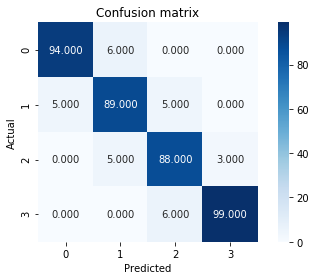

In [44]:
y_pred = bccbo.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average